How to Develop a Neural Net for Predicting Car Insurance Payout

Developing a neural network predictive model for a new dataset can be challenging.

One approach is to first inspect the dataset and develop ideas for what models might work, then explore the learning dynamics of simple models on the dataset, then finally develop and tune a model for the dataset with a robust test harness.

This process can be used to develop effective neural network models for classification and regression predictive modeling problems.

In this tutorial, you will discover how to develop a Multilayer Perceptron neural network model for the Swedish car insurance regression dataset.

After completing this tutorial, you will know:

How to load and summarize the Swedish car insurance dataset and use the results to suggest data preparations and model configurations to use.
How to explore the learning dynamics of simple MLP models and data transforms on the dataset.
How to develop robust estimates of model performance, tune model performance, and make predictions on new data.

1. Auto Insurance Regression Dataset

2. First MLP and Learning Dynamics

3. Evaluating and Tuning MLP Models
4. Final Model and Make Predictions

The first step is to define and explore the dataset.

We will be working with the “Auto Insurance” standard regression dataset.

The dataset describes Swedish car insurance. There is a single input variable, which is the number of claims, and the target variable is a total payment for the claims in thousands of Swedish krona. The goal is to predict the total payment given the number of claims.

In [1]:
# load the dataset and summarize the shape
from pandas import read_csv

# define the location of the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/auto-insurance.csv'

# load the dataset
df = read_csv(url, header=None)

# summarize shape
print(df.shape)

(63, 2)


In this case, we can confirm that the dataset has two variables (one input and one output) and that the dataset has 63 rows of data.

This is not many rows of data for a neural network and suggests that a small network, perhaps with regularization, would be appropriate.

It also suggests that using k-fold cross-validation would be a good idea given that it will give a more reliable estimate of model performance than a train/test split and because a single model will fit in seconds instead of hours or days with the largest datasets.

                0           1
count   63.000000   63.000000
mean    22.904762   98.187302
std     23.351946   87.327553
min      0.000000    0.000000
25%      7.500000   38.850000
50%     14.000000   73.400000
75%     29.000000  140.000000
max    124.000000  422.200000


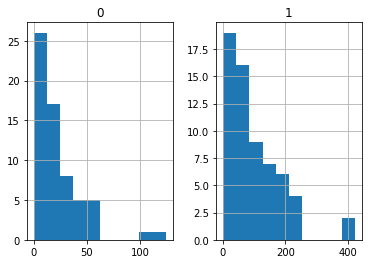

In [4]:
# show summary statistics and plots of the dataset
from pandas import read_csv
from matplotlib import pyplot

# define the location of the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/auto-insurance.csv'

# load the dataset
df = read_csv(url, header=None)

# show summary statistics
print(df.describe())

# plot histograms
import matplotlib.pyplot as plt
df.hist()
plt.show()

We can see that each variable has a similar distribution. It looks like a skewed Gaussian distribution or an exponential distribution.

We may have some benefit in using a power transform on each variable in order to make the probability distribution less skewed, which will likely improve model performance.

Now that we are familiar with the dataset, let’s explore how we might develop a neural network model.

First MLP and Learning Dynamics
We will develop a Multilayer Perceptron (MLP) model for the dataset using TensorFlow.

We cannot know what model architecture of learning hyperparameters would be good or best for this dataset, so we must experiment and discover what works well.

Given that the dataset is small, a small batch size is probably a good idea, e.g. 8 or 16 rows. Using the Adam version of stochastic gradient descent is a good idea when getting started as it will automatically adapt the learning rate and works well on most datasets.

Before we evaluate models in earnest, it is a good idea to review the learning dynamics and tune the model architecture and learning configuration until we have stable learning dynamics, then look at getting the most out of the model.

We can do this by using a simple train/test split of the data and review plots of the learning curves. This will help us see if we are over-learning or under-learning; then we can adapt the configuration accordingly.

First, we can split the dataset into input and output variables, then into 67/33 train and test sets.

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split



In [7]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Next, we can define a minimal MLP model. In this case, we will use one hidden layer with 10 nodes and one output layer (chosen arbitrarily). We will use the ReLU activation function in the hidden layer and the “he_normal” weight initialization, as together, they are a good practice.

The output of the model is a linear activation (no activation) and we will minimize mean squared error (MSE) loss.

In [14]:
! python.exe -m pip install --upgrade tensorflow

ERROR: Could not find a version that satisfies the requirement tensorflow
ERROR: No matching distribution found for tensorflow


In [9]:
from tensorflow.keras import layers
from tensorflow.keras import activations

model.add(layers.Dense(64))
model.add(layers.Activation(activations.relu))

ModuleNotFoundError: No module named 'tensorflow'

In [8]:
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse')

NameError: name 'Sequential' is not defined